# **PREPROCESSING**

In [211]:
# import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [212]:
# read in dataframes
communities = pd.read_csv("communities.csv")
housesBySuburb = pd.read_csv("Houses-by-suburb.csv")

In [213]:
# condensing dataset to only have columns that are likely factors in predicting house prices
columns = (['Community Name', 'Region', 'Location', 'Population Density', 'LGA', 'IRSD (avg)', 'Area (km^2)',
            'ARIA+ (avg)', 'Commercial (%)', 'Industrial (%)', 'Residential (%)', 'Rural (%)', '2012 ERP age 0-4, %',
            '2012 ERP age 5-9, %','2012 ERP age 10-14, %','2012 ERP age 15-19, %','2012 ERP age 20-24, %',
            '2012 ERP age 25-44, %','2012 ERP age 45-64, %','2012 ERP age 65-69, %','2012 ERP age 70-74, %',
            '2012 ERP age 75-79, %','2012 ERP age 80-84, %','2012 ERP age 85+, %', '2012 ERP, total',
            'Public Hospitals', 'Private Hospitals', 'Community Health Centres',
            'Allied Health', 'Alternative Health', 'Child Protection and Family', 'Dental', 'Disability',
            'General Practice', 'Homelessness', 'Mental Health', 'Pharmacies', 'Aged Care (High Care)',
            'Aged Care (Low Care)', 'Aged Care (SRS)', 'Kinder and/or Childcare', 'Centrelink Offices',
            'Medicare Offices', 'Medicare Access Points', 'Number of Households', 'Average persons per household',
            'Occupied private dwellings, %', '% dwellings which are public housing', 'Dwellings with no internet, %',
            'Equivalent household income <$600/week, %', 'Number of families', '% change, 2007-2012, total',
            'Primary school students', 'Secondary school students','TAFE students', 'University students', 
            'Holds degree or higher, %', 'Did not complete year 12, %','Unemployed, %', 'Top industry', 
            'Top occupation', 'Born overseas, %', 'Born in non-English speaking country, %', 'Poor English proficiency, %', 
            'Top country of birth', 'Top country of birth, %', 'Top language spoken', 'Distance to nearest public hospital'])
communities_2 = communities[columns]

In [214]:
# only including suburbs
communities_2_suburbs = communities_2[communities_2['Community Name'].str.contains('Suburb')].reset_index(drop=True)

In [215]:
# checking which columns have the wrong data types and have NaN values

communities_2_suburbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 68 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Community Name                             452 non-null    object 
 1   Region                                     452 non-null    object 
 2   Location                                   452 non-null    object 
 3   Population Density                         452 non-null    float64
 4   LGA                                        452 non-null    object 
 5   IRSD (avg)                                 452 non-null    float64
 6   Area (km^2)                                452 non-null    float64
 7   ARIA+ (avg)                                452 non-null    float64
 8   Commercial (%)                             452 non-null    float64
 9   Industrial (%)                             452 non-null    float64
 10  Residential (%)           

In [216]:
# printing the number of rows that have '<5' instead of a number for each column

print(f"Number of families: {communities_2_suburbs[communities_2_suburbs['Number of families'] == '<5'].shape}")
print(f"Primary school students: {communities_2_suburbs[communities_2_suburbs['Primary school students'] == '<5'].shape}")
print(f"Secondary school students: {communities_2_suburbs[communities_2_suburbs['Secondary school students'] == '<5'].shape}")
print(f"TAFE students: {communities_2_suburbs[communities_2_suburbs['TAFE students'] == '<5'].shape}")
print(f"University students: {communities_2_suburbs[communities_2_suburbs['University students'] == '<5'].shape}")

Number of families: (0, 68)
Primary school students: (3, 68)
Secondary school students: (2, 68)
TAFE students: (7, 68)
University students: (5, 68)


In [217]:
# changing columns that are supposed to be integers into integers

communities_2_suburbs['Number of families'] = communities_2_suburbs['Number of families'].astype(int)

communities_2_suburbs['Primary school students'] = (np.where(communities_2_suburbs['Primary school students'].str.contains('<'), 
                                                        5, communities_2_suburbs['Primary school students'])).astype(int)

communities_2_suburbs['Secondary school students'] = (np.where(communities_2_suburbs['Secondary school students'].str.contains('<'), 
                                                        5, communities_2_suburbs['Secondary school students'])).astype(int)

communities_2_suburbs['TAFE students'] = (np.where(communities_2_suburbs['TAFE students'].str.contains('<'), 
                                                        5, communities_2_suburbs['TAFE students'])).astype(int)

communities_2_suburbs['University students'] = (np.where(communities_2_suburbs['University students'].str.contains('<'), 
                                                        5, communities_2_suburbs['University students'])).astype(int)

In [218]:
# filling NaN values
communities_2_suburbs['% dwellings which are public housing'] = (np.where(communities_2_suburbs['% dwellings which are public housing'].isna(),
                                                                0, communities_2_suburbs['% dwellings which are public housing']))

communities_2_suburbs['Dwellings with no internet, %'] = (np.where(communities_2_suburbs['Dwellings with no internet, %'].isna(),
                                                                5.3191, communities_2_suburbs['Dwellings with no internet, %']))

communities_2_suburbs['Equivalent household income <$600/week, %'] = (np.where(communities_2_suburbs['Equivalent household income <$600/week, %'].isna(),
                                                                20, communities_2_suburbs['Equivalent household income <$600/week, %']))

In [219]:
# checking if converting data types and filling in NaN values worked

communities_2_suburbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 68 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Community Name                             452 non-null    object 
 1   Region                                     452 non-null    object 
 2   Location                                   452 non-null    object 
 3   Population Density                         452 non-null    float64
 4   LGA                                        452 non-null    object 
 5   IRSD (avg)                                 452 non-null    float64
 6   Area (km^2)                                452 non-null    float64
 7   ARIA+ (avg)                                452 non-null    float64
 8   Commercial (%)                             452 non-null    float64
 9   Industrial (%)                             452 non-null    float64
 10  Residential (%)           

In [220]:
# merging together some age groups into one column

communities_2_suburbs['Aged 0-14, %'] = (communities_2_suburbs[['2012 ERP age 0-4, %',
                                                                '2012 ERP age 5-9, %',
                                                                '2012 ERP age 10-14, %']]).sum(axis=1)

communities_2_suburbs['Aged 15-19, %'] = communities_2_suburbs['2012 ERP age 15-19, %']

communities_2_suburbs['Aged 20-44, %'] = (communities_2_suburbs[['2012 ERP age 20-24, %',
                                                                '2012 ERP age 25-44, %']]).sum(axis=1)

communities_2_suburbs['Aged 45-64, %'] = communities_2_suburbs['2012 ERP age 45-64, %']

communities_2_suburbs['Aged 65+, %'] = (communities_2_suburbs[['2012 ERP age 65-69, %',
                                                                '2012 ERP age 70-74, %',
                                                                '2012 ERP age 75-79, %',
                                                                '2012 ERP age 80-84, %',
                                                                '2012 ERP age 85+, %']]).sum(axis=1)
(communities_2_suburbs.drop(['2012 ERP age 0-4, %', '2012 ERP age 5-9, %','2012 ERP age 10-14, %','2012 ERP age 15-19, %','2012 ERP age 20-24, %',
            '2012 ERP age 25-44, %','2012 ERP age 45-64, %','2012 ERP age 65-69, %','2012 ERP age 70-74, %',
            '2012 ERP age 75-79, %','2012 ERP age 80-84, %','2012 ERP age 85+, %'], axis=1, inplace=True))

In [221]:
# merging columns and removing the original column
communities_2_suburbs['Aged Care'] = (communities_2_suburbs[['Aged Care (High Care)',
                                                            'Aged Care (Low Care)',
                                                            'Aged Care (SRS)']]).sum(axis=1)
communities_2_suburbs.drop(['Aged Care (High Care)', 'Aged Care (Low Care)', 'Aged Care (SRS)'], axis=1, inplace=True)

communities_2_suburbs['Other Health Services'] = (communities_2_suburbs[['Allied Health', 'Alternative Health']]).sum(axis=1)
communities_2_suburbs.drop(['Allied Health', 'Alternative Health'], axis=1, inplace=True)

communities_2_suburbs['GP and Dental'] = (communities_2_suburbs[['General Practice', 'Dental']]).sum(axis=1)
communities_2_suburbs.drop(['General Practice', 'Dental'], axis=1, inplace=True)

communities_2_suburbs['Medicare'] = (communities_2_suburbs[['Medicare Offices', 'Medicare Access Points']]).sum(axis=1)
communities_2_suburbs.drop(['Medicare Offices', 'Medicare Access Points'], axis=1, inplace=True)


In [222]:

# separating location into direction and distance columns 
communities_2_suburbs['Location'] = communities_2_suburbs['Location'].str.strip(' of Melbourne')

pattern_direction = r'km \w+'
pattern_distance = r'\d+'

direction = {}
distance = {}

for index, text in enumerate(communities_2_suburbs['Location']):
    direction[index] = (re.search(pattern_direction, text)).group()
    distance[index] = (re.search(pattern_distance, text)).group()

direction_series = pd.Series(direction)
distance_series = pd.Series(distance)

communities_2_suburbs['Distance'] = distance_series
communities_2_suburbs['Distance'] = communities_2_suburbs['Distance'].astype(int)
communities_2_suburbs['Direction'] = direction_series
communities_2_suburbs['Direction'] = communities_2_suburbs['Direction'].str.strip('km ')

communities_2_suburbs.drop(columns = ['Location'], inplace=True)

In [223]:
# the point of the following code is to match up the suburbs on the "houses by suburb" file 
# with the suburbs on the communities data file 
# written by Heather 

import pandas as pd
import numpy as np
import re
import json


def matching(burb, community):
    # i am not sure how to deal with what i think is a problem with escaping characters. how can i use r with a variable
    lowerBurb = burb.lower()
    lowerCommunity = community.lower()
    find_pattern = r"[. ' ? : - , 1 2 3 4 5 6 7 8 9 0]"
    replace = r" "
    nPLowerBurb = re.sub(find_pattern, replace, lowerBurb)
    nPLowerCommunity = re.sub(find_pattern, replace, lowerCommunity)
    find_pattern = r"[)]"
    replace = r"\)"
    nPLowerBurb = re.sub(find_pattern, replace, nPLowerBurb)
    nPLowerCommunity = re.sub(find_pattern, replace, nPLowerCommunity)
    find_pattern = r"[(]"
    replace = r"\("
    nPLowerBurb = re.sub(find_pattern, replace, nPLowerBurb)
    nPLowerCommunity = re.sub(find_pattern, replace, nPLowerCommunity)

    if re.search(nPLowerBurb, nPLowerCommunity): 
        return True
    else: 
        return False

def suburb(community):
    pattern = r'(Suburb)'


    if re.search(pattern, community):
        return True
    else: 
        return False


housesSeries = list(range(0, 452))
prices = list(range(0,452))

n = 0

nmatches = 0
nnan = 0
nnotsuburb = 0

for community in communities_2_suburbs["Community Name"]:
    #n = n + 1
    
    if (n <= 1079): # can probs get rid of that 
        if suburb(community): #if the community is a suburb
            i = 0
            for burb in housesBySuburb["Locality"]:
                    
                    if matching(burb, community):
                    # add to series
                        housesSeries[n] = community
                        nmatches = nmatches + 1
                        prices[n] = housesBySuburb["2013"].iloc[i]
                        break
                    else: 
                        i = i + 1
            if (housesSeries[n] == n): # ie it hasn't been changed by finding a match 
                housesSeries[n] = np.nan
                nnan = nnan + 1
                prices[n] = np.nan
        else: 
            housesSeries[n] = -2
            nnotsuburb = nnotsuburb + 1
    n = n+ 1
housesSeries = pd.Series(housesSeries)    
prices = pd.Series(prices)            

json_str = housesSeries.to_json()
json.dump(json.loads(json_str),
open("housesSeries.json", "w"))



In [224]:
# merging communities df and houses series 
suburbs_and_communities = []
suburbs_and_communities = pd.DataFrame(suburbs_and_communities)
suburbs_and_communities = pd.concat([housesSeries, prices, communities_2_suburbs], axis = 1)
suburbs_and_communities.head(50)


,0,1,Community Name,Region,Population Density,LGA,IRSD (avg),Area (km^2),ARIA+ (avg),Commercial (%),...,"Aged 15-19, %","Aged 20-44, %","Aged 45-64, %","Aged 65+, %",Aged Care,Other Health Services,GP and Dental,Medicare,Distance,Direction
0,Abbotsford (Suburb),792500,Abbotsford (Suburb),Northern and Western Metropolitan,3082.440714,Yarra (C),1054.014288,1.740504,0.00,21.187047,...,3.373719,55.097856,21.397950,9.748369,84,13,5,0,3,ENE
1,Aberfeldie (Suburb),947500,Aberfeldie (Suburb),Northern and Western Metropolitan,2426.665450,Moonee Valley (C),1087.153516,1.551512,0.00,1.179279,...,8.260292,31.713147,28.818061,11.686587,0,0,1,0,8,NW
2,Airport West (Suburb),532000,Airport West (Suburb),Northern and Western Metropolitan,1972.445069,Moonee Valley (C),1005.800016,3.719242,0.00,23.654685,...,4.511996,37.322792,22.573610,20.256270,0,1,5,1,12,NW
3,Albanvale (Suburb),313000,Albanvale (Suburb),Northern and Western Metropolitan,2879.831482,Brimbank (C),876.572822,1.903584,0.00,0.009901,...,6.238599,36.391828,28.529734,9.668004,0,0,0,0,19,WNW
4,Albert Park (Suburb),1360000,Albert Park (Suburb),Southern Metropolitan,1850.280150,Port Phillip (C),1069.654772,3.455693,0.00,2.916951,...,2.862058,39.943697,25.258054,15.858617,94,16,7,0,3,S
5,Albion (Suburb),379000,Albion (Suburb),Northern and Western Metropolitan,1765.696283,Brimbank (C),882.629550,2.563861,0.00,0.170935,...,4.660923,49.105368,19.681909,10.779766,0,0,0,0,14,WNW
6,Alfredton (Suburb),361500,Alfredton (Suburb),Grampians,950.801990,Ballarat (C),1046.878133,8.007977,0.22,0.185930,...,8.917783,32.203835,24.954032,10.362490,68,0,1,0,106,WNW
7,Alphington (Suburb),1080000,Alphington (Suburb),Northern and Western Metropolitan,1737.285234,Darebin (C),1088.489949,2.816463,0.00,1.736401,...,4.945841,37.032495,27.713059,11.117924,72,1,0,0,7,ENE
8,Altona Meadows (Suburb),572500,Altona Meadows (Suburb),Northern and Western Metropolitan,1850.869921,Hobsons Bay (C),981.171516,10.539368,0.00,0.737421,...,6.484852,38.796330,26.974932,11.236992,210,20,5,0,17,WSW
9,Altona North (Suburb),572500,Altona North (Suburb),Northern and Western Metropolitan,857.216967,Hobsons Bay (C),907.582641,14.029120,0.00,1.929309,...,5.421587,35.315151,18.925661,22.459671,324,14,6,1,12,WSW


In [225]:
# get rid of nan values
suburbs_and_communities.dropna(subset=[0], inplace=True)
suburbs_and_communities.drop(columns=['Community Name'], inplace=True)
suburbs_and_communities.rename(columns={0: 'Community Name', 1: 'House Price'}, inplace=True)
suburbs_and_communities['House Price'] = suburbs_and_communities['House Price'].astype(int)
suburbs_and_communities.reset_index(inplace=True, drop=True)
suburbs_and_communities.head(20)

,Community Name,House Price,Region,Population Density,LGA,IRSD (avg),Area (km^2),ARIA+ (avg),Commercial (%),Industrial (%),...,"Aged 15-19, %","Aged 20-44, %","Aged 45-64, %","Aged 65+, %",Aged Care,Other Health Services,GP and Dental,Medicare,Distance,Direction
0,Abbotsford (Suburb),792500,Northern and Western Metropolitan,3082.440714,Yarra (C),1054.014288,1.740504,0.00,21.187047,19.662327,...,3.373719,55.097856,21.397950,9.748369,84,13,5,0,3,ENE
1,Aberfeldie (Suburb),947500,Northern and Western Metropolitan,2426.665450,Moonee Valley (C),1087.153516,1.551512,0.00,1.179279,0.000000,...,8.260292,31.713147,28.818061,11.686587,0,0,1,0,8,NW
2,Airport West (Suburb),532000,Northern and Western Metropolitan,1972.445069,Moonee Valley (C),1005.800016,3.719242,0.00,23.654685,1.642235,...,4.511996,37.322792,22.573610,20.256270,0,1,5,1,12,NW
3,Albanvale (Suburb),313000,Northern and Western Metropolitan,2879.831482,Brimbank (C),876.572822,1.903584,0.00,0.009901,0.000000,...,6.238599,36.391828,28.529734,9.668004,0,0,0,0,19,WNW
4,Albert Park (Suburb),1360000,Southern Metropolitan,1850.280150,Port Phillip (C),1069.654772,3.455693,0.00,2.916951,0.000000,...,2.862058,39.943697,25.258054,15.858617,94,16,7,0,3,S
5,Albion (Suburb),379000,Northern and Western Metropolitan,1765.696283,Brimbank (C),882.629550,2.563861,0.00,0.170935,17.908693,...,4.660923,49.105368,19.681909,10.779766,0,0,0,0,14,WNW
6,Alfredton (Suburb),361500,Grampians,950.801990,Ballarat (C),1046.878133,8.007977,0.22,0.185930,18.085870,...,8.917783,32.203835,24.954032,10.362490,68,0,1,0,106,WNW
7,Alphington (Suburb),1080000,Northern and Western Metropolitan,1737.285234,Darebin (C),1088.489949,2.816463,0.00,1.736401,5.841581,...,4.945841,37.032495,27.713059,11.117924,72,1,0,0,7,ENE
8,Altona Meadows (Suburb),572500,Northern and Western Metropolitan,1850.869921,Hobsons Bay (C),981.171516,10.539368,0.00,0.737421,0.000349,...,6.484852,38.796330,26.974932,11.236992,210,20,5,0,17,WSW
9,Altona North (Suburb),572500,Northern and Western Metropolitan,857.216967,Hobsons Bay (C),907.582641,14.029120,0.00,1.929309,18.138681,...,5.421587,35.315151,18.925661,22.459671,324,14,6,1,12,WSW


In [226]:
# removing NaN values and columns with NaN values if those columns do not have a somewhat linear relationship with house prices
suburbs_and_communities.drop(columns=['% change, 2007-2012, total'], inplace=True)
suburbs_and_communities['Holds degree or higher, %'].fillna(0, inplace=True)
median = suburbs_and_communities['Unemployed, %'].median()
suburbs_and_communities['Unemployed, %'].fillna(median, inplace=True)
suburbs_and_communities.drop(columns=['Poor English proficiency, %'], inplace=True)

In [227]:
# all NaN values are removed
suburbs_and_communities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Community Name                             426 non-null    object 
 1   House Price                                426 non-null    int64  
 2   Region                                     426 non-null    object 
 3   Population Density                         426 non-null    float64
 4   LGA                                        426 non-null    object 
 5   IRSD (avg)                                 426 non-null    float64
 6   Area (km^2)                                426 non-null    float64
 7   ARIA+ (avg)                                426 non-null    float64
 8   Commercial (%)                             426 non-null    float64
 9   Industrial (%)                             426 non-null    float64
 10  Residential (%)           

In [228]:
# getting data types for each column as a list and separating them by data type (numerical/categorical)
column_datatypes = suburbs_and_communities.dtypes.tolist()
column_names = suburbs_and_communities.columns.tolist()

clean_column_dtypes = []
num_column_names = []

for datatype in column_datatypes:
    clean_column_dtypes.append(str(datatype).replace("dtype('", ""))

for index, datatype in enumerate(clean_column_dtypes):
    if datatype != 'object':
        num_column_names.append(column_names[index])
cat_column_names = ["House Price", "Region","LGA","Top industry","Top occupation","Top language spoken","Direction"]
num_column_names_2 = ['House Price', 'Population Density', 'IRSD (avg)', 'Area (km^2)', 'ARIA+ (avg)', 'Commercial (%)', 'Industrial (%)', 'Residential (%)', 'Rural (%)', '2012 ERP, total', 'Public Hospitals', 'Private Hospitals', 'Community Health Centres', 'Child Protection and Family', 'Disability', 'Homelessness', 'Mental Health', 'Pharmacies', 'Kinder and/or Childcare', 'Centrelink Offices', 'Number of Households', 'Average persons per household', 'Occupied private dwellings, %', '% dwellings which are public housing', 'Dwellings with no internet, %', 'Equivalent household income <$600/week, %', 'Number of families', 'Primary school students', 'Secondary school students', 'TAFE students', 'University students', 'Holds degree or higher, %', 'Did not complete year 12, %', 'Unemployed, %', 'Born overseas, %', 'Born in non-English speaking country, %', 'Top country of birth, %', 'Distance to nearest public hospital', 'Aged 0-14, %', 'Aged 15-19, %', 'Aged 20-44, %', 'Aged 45-64, %', 'Aged 65+, %', 'Aged Care', 'Other Health Services', 'GP and Dental', 'Medicare', 'Distance']

In [229]:
# defining some new dataframes for different types of analysis
suburbs_and_communities_cat = suburbs_and_communities[cat_column_names]
suburbs_and_communities_num = suburbs_and_communities[num_column_names]
suburbs_and_communities_num_d = suburbs_and_communities_num.copy()
suburbs_and_communities_num_woh = suburbs_and_communities[num_column_names[1:]]
suburbs_and_communities_d = suburbs_and_communities.copy()
suburbs_and_communities_lr = suburbs_and_communities.copy()

In [230]:
# applies a transformation to a column in the dataframe. Applying these transformation to better linearise the data.
def transform_col(df, x_col, y_col, transformation='log'):
    # Apply the specified transformation to the y-column
    if transformation == 'log':
        df[y_col + '_log'] = np.log(df[y_col] + 1)  # Add 1 to avoid log(0)
        transformed_y = y_col + '_log'
    elif transformation == 'squared':
        df[y_col + '_squared'] = df[y_col] ** 2
        transformed_y = y_col + '_squared'
    elif transformation == 'reciprocal':
        df[y_col + '_reciprocal'] = 1 / (df[y_col] + 1e-9)  # Add a small constant to avoid division by zero
        transformed_y = y_col + '_reciprocal'

# applying transformations to some columns in the data. Adding transformed column to both discrete df and linear reg df.
transform_col(suburbs_and_communities_d,'House Price','IRSD (avg)','squared')
transform_col(suburbs_and_communities_lr,'House Price','IRSD (avg)','squared')
transform_col(suburbs_and_communities_d,'House Price','Holds degree or higher, %','squared')
transform_col(suburbs_and_communities_lr,'House Price','Holds degree or higher, %','squared')
transform_col(suburbs_and_communities_d,'House Price','Did not complete year 12, %','reciprocal')
transform_col(suburbs_and_communities_lr,'House Price','Did not complete year 12, %','reciprocal')
transform_col(suburbs_and_communities_d,'House Price','Distance', 'log')
transform_col(suburbs_and_communities_lr,'House Price','Distance', 'log')

# append new numeric data features to the num_column_names
num_column_names.append('IRSD (avg)_squared')
num_column_names.append('Holds degree or higher, %_squared')
num_column_names.append('Did not complete year 12, %_reciprocal')
num_column_names.append('Distance_log')

# list with all the transformed cols  
transformed_cols = ['IRSD (avg)_squared','Holds degree or higher, %_squared', 'Did not complete year 12, %_reciprocal','Distance_log']

# **EDA + preprocessing**

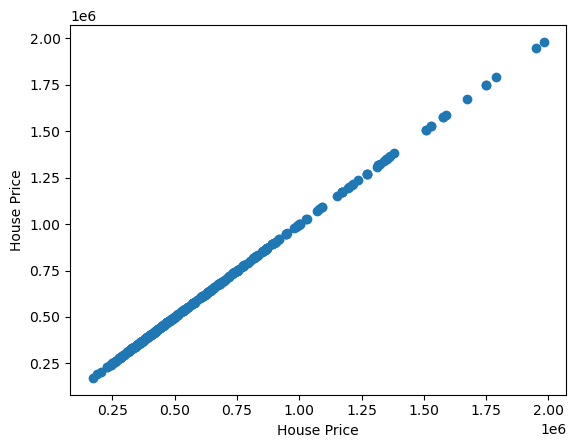

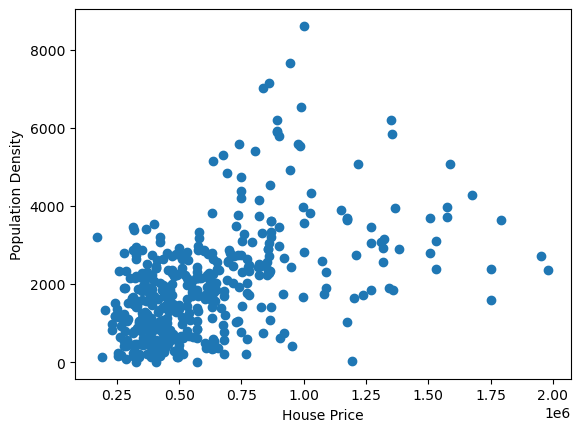

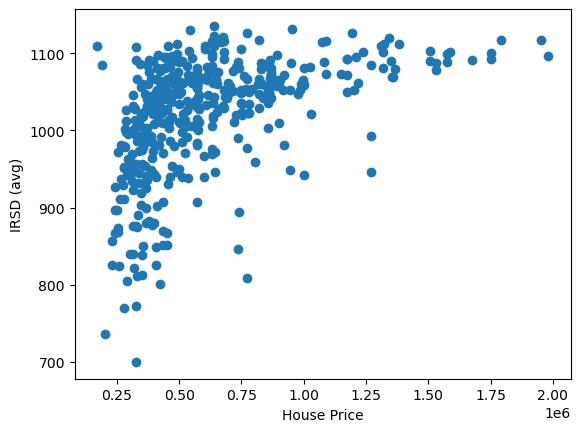

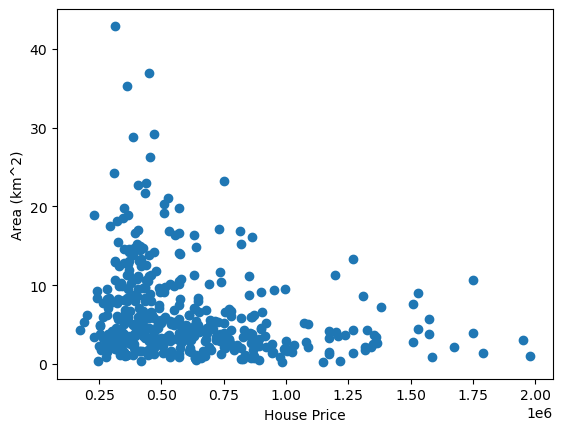

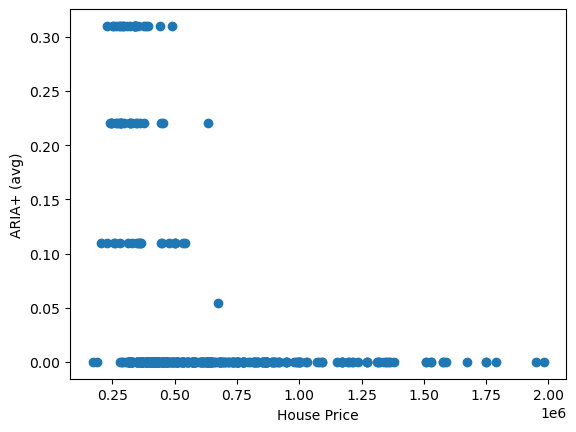

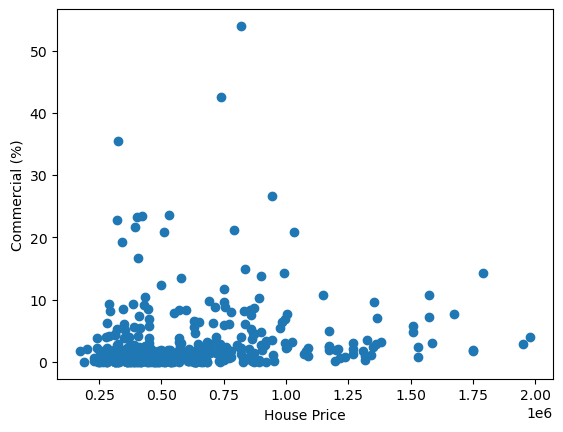

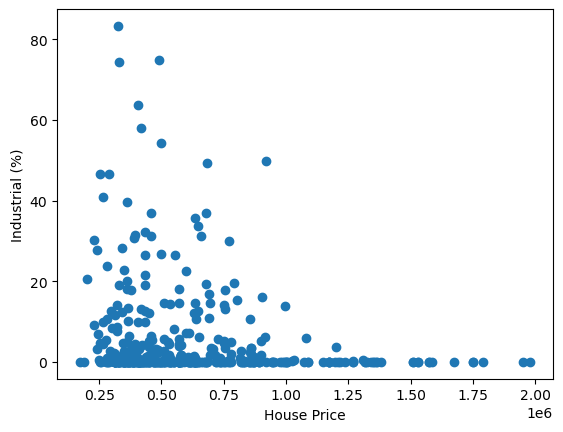

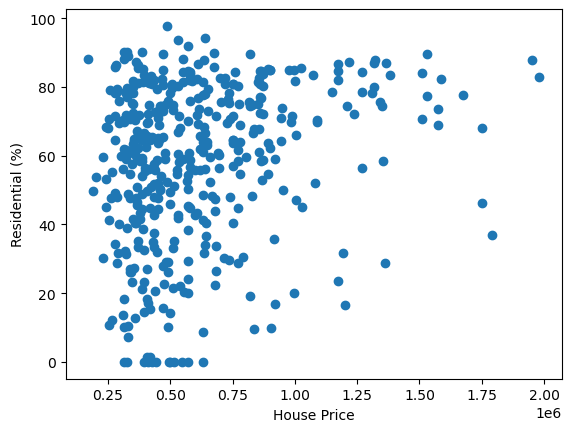

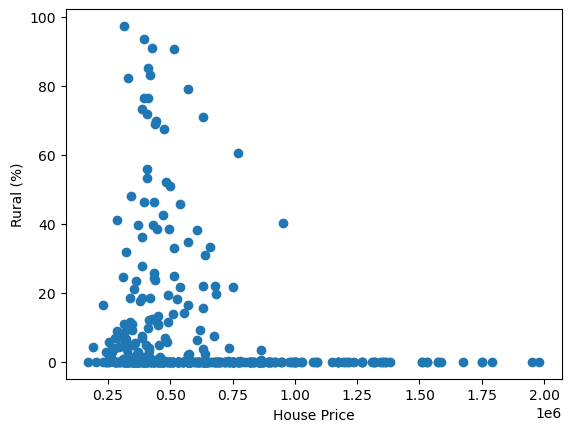

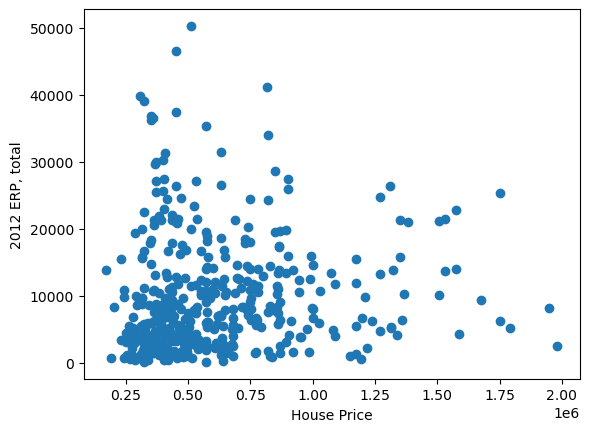

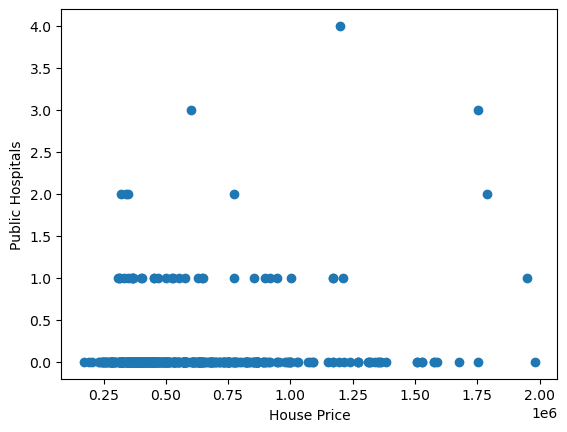

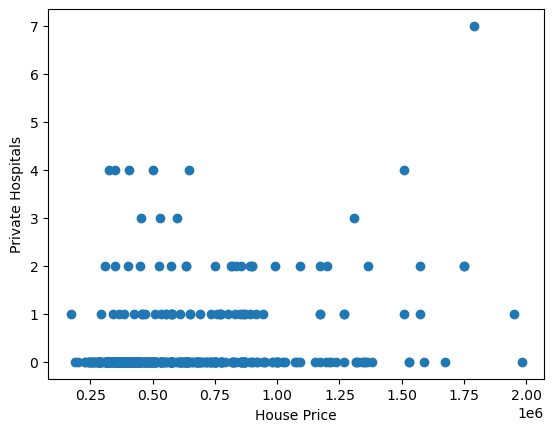

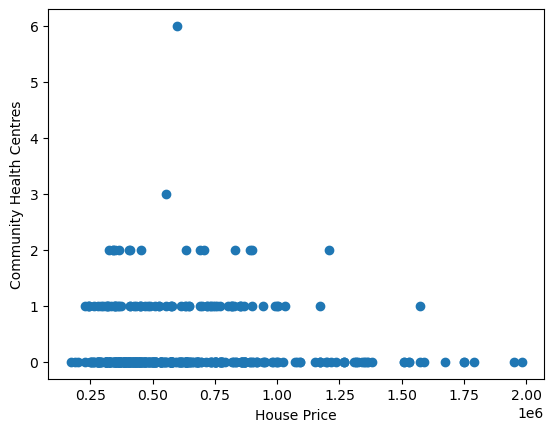

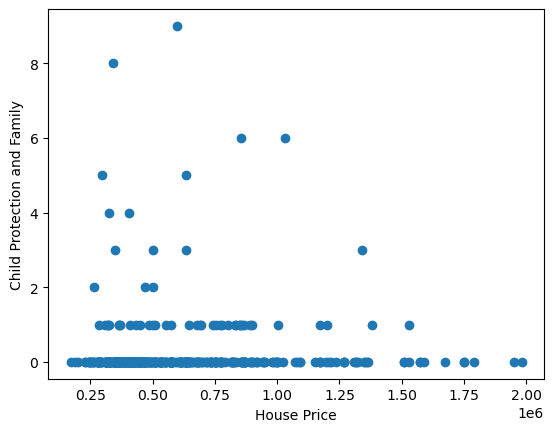

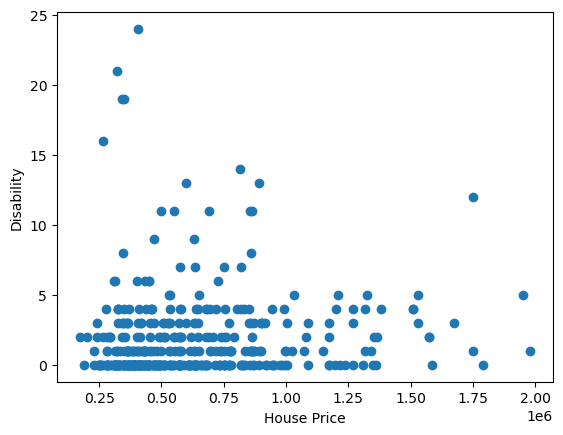

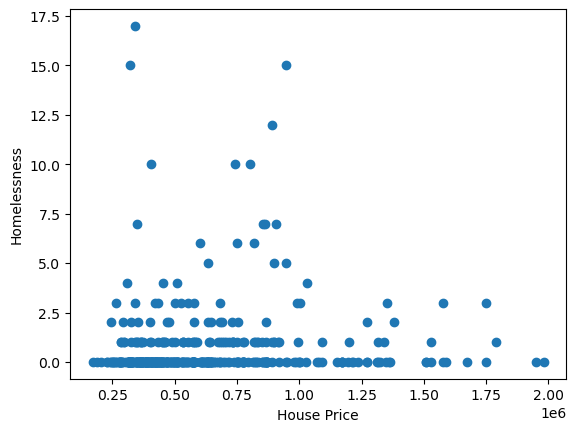

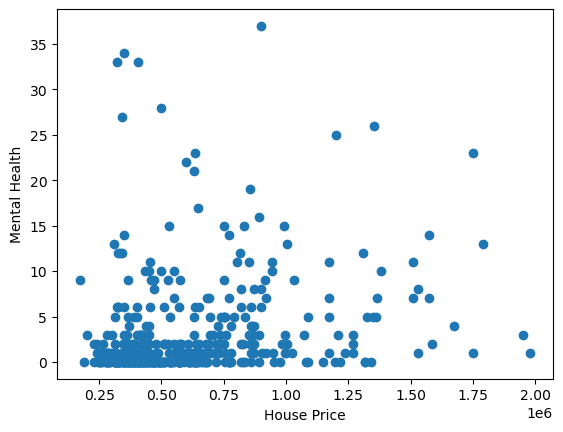

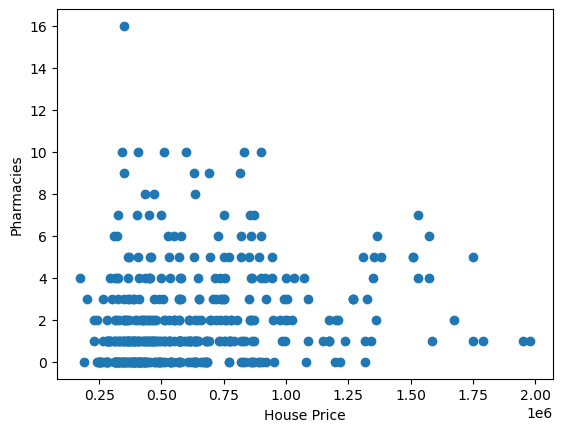

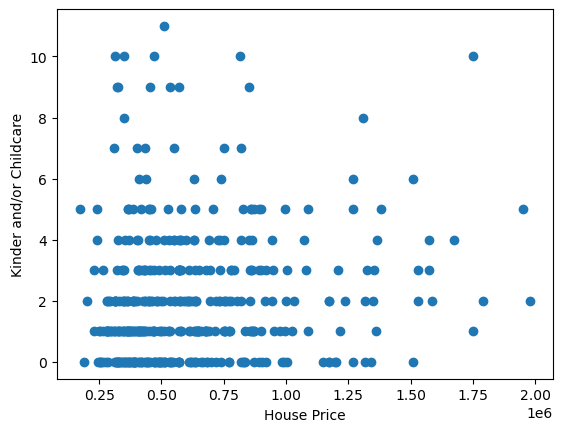

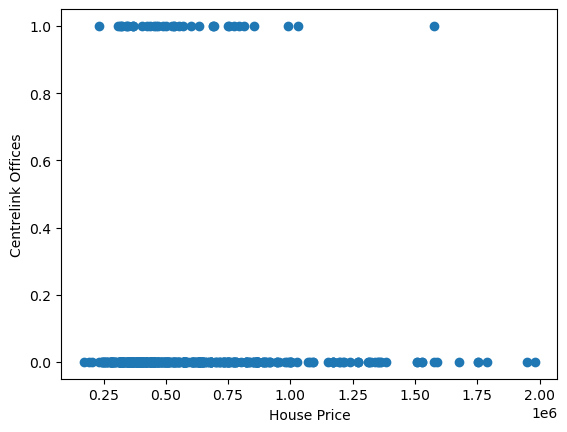

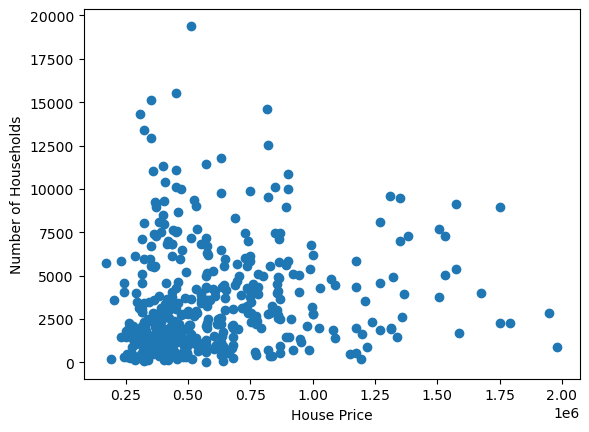

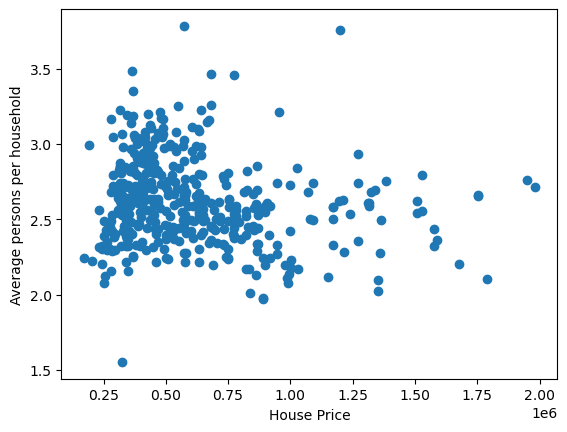

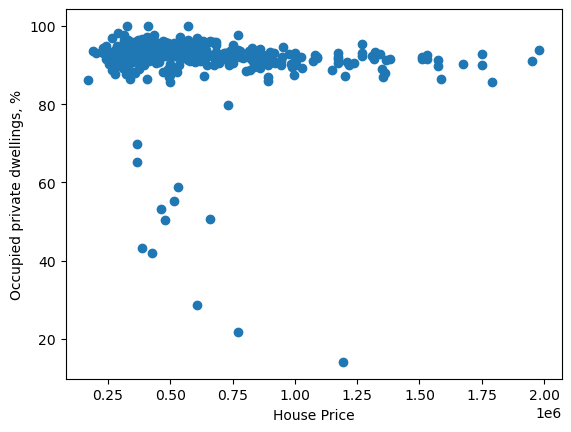

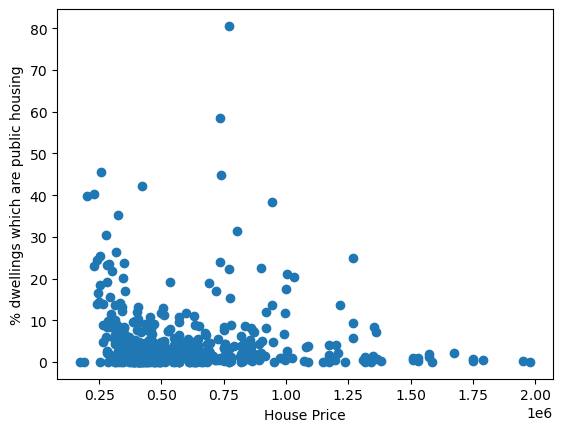

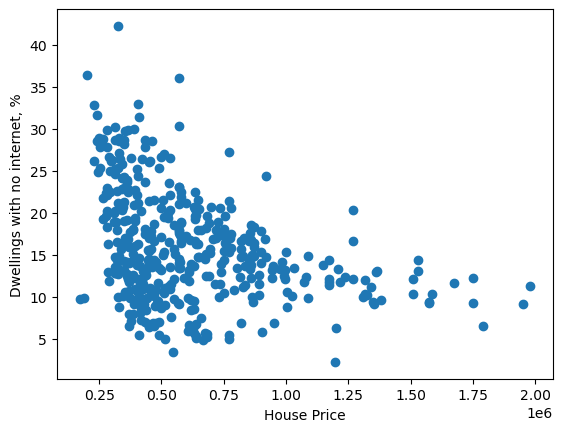

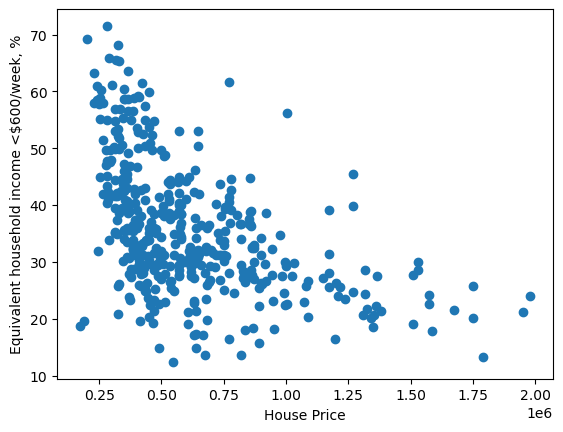

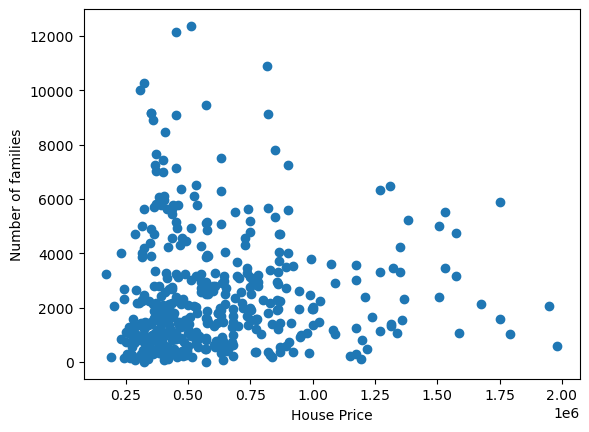

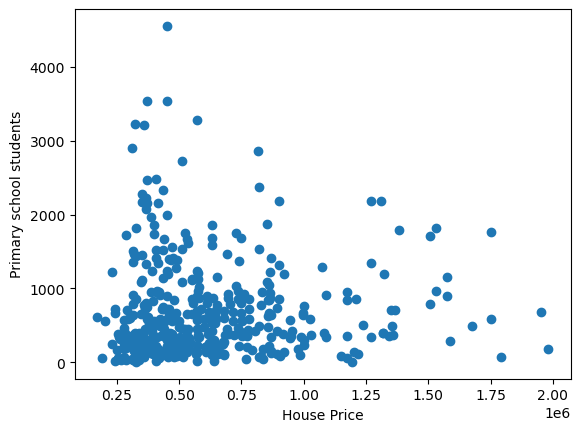

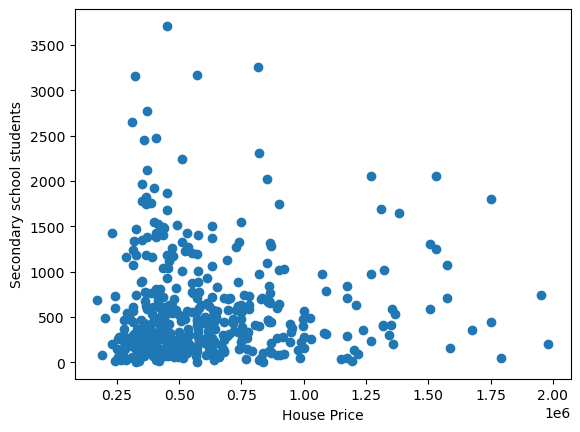

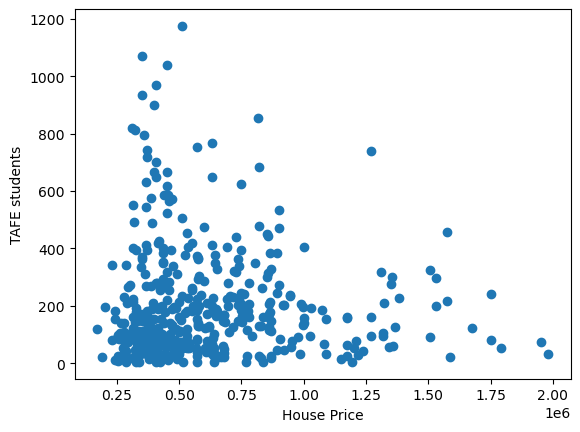

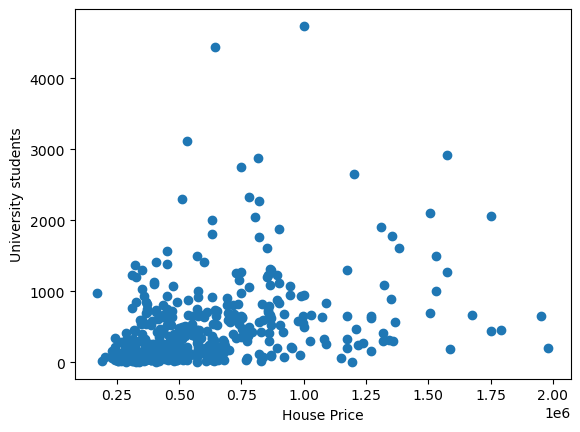

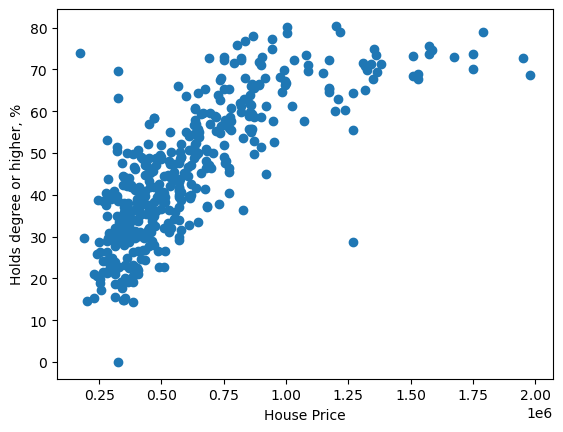

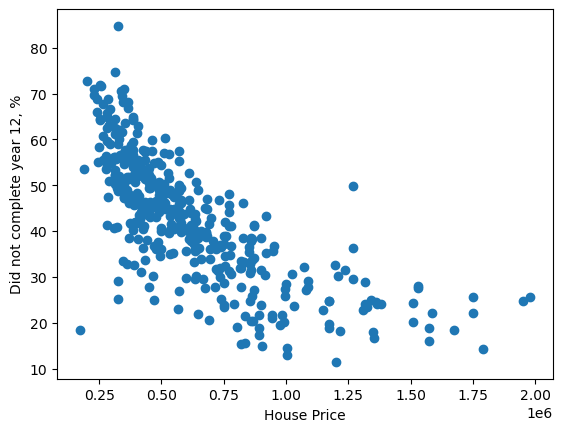

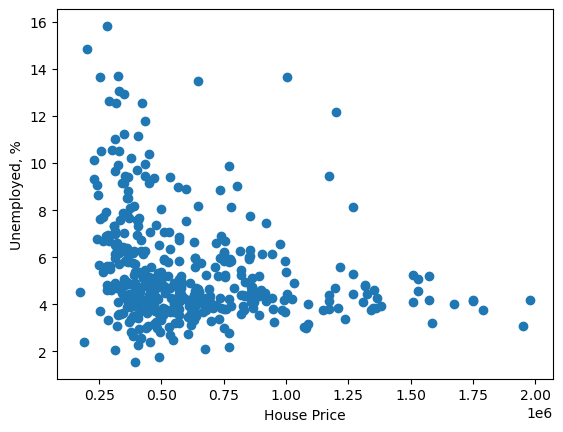

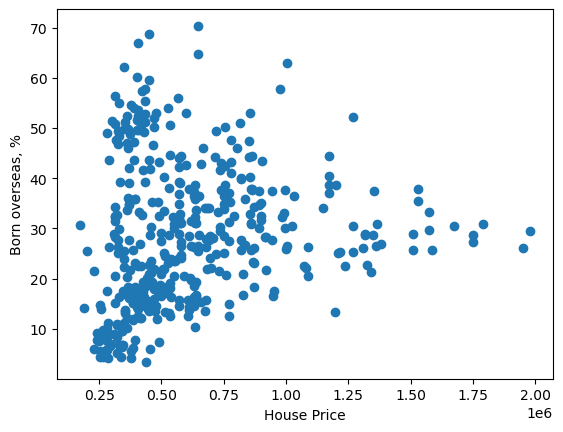

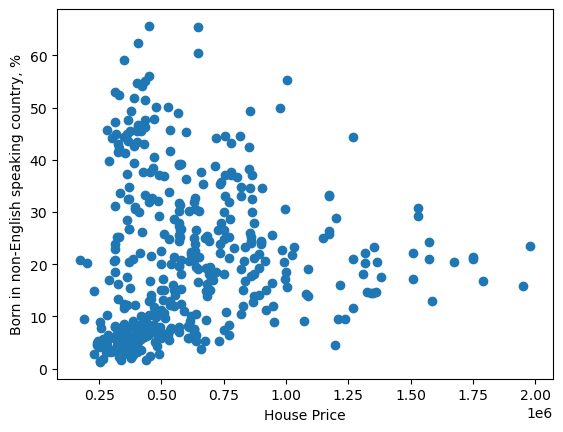

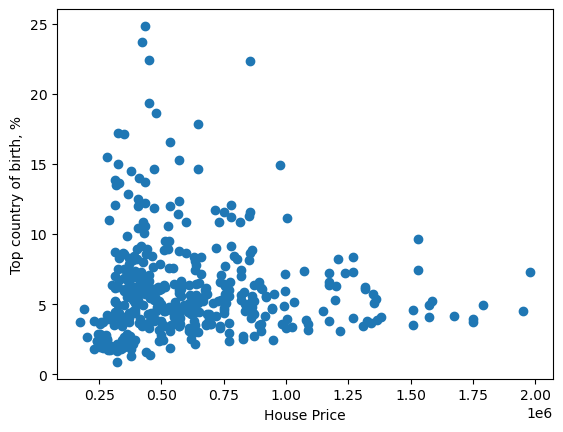

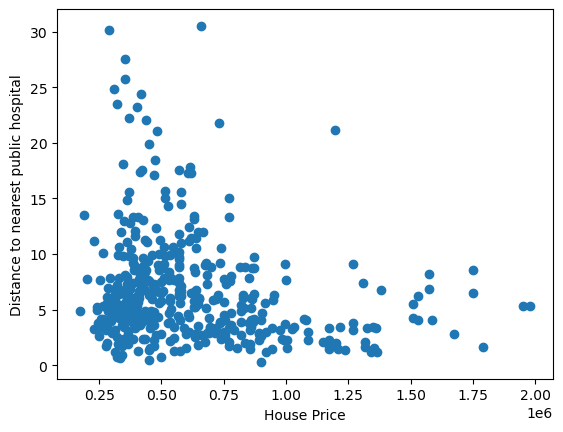

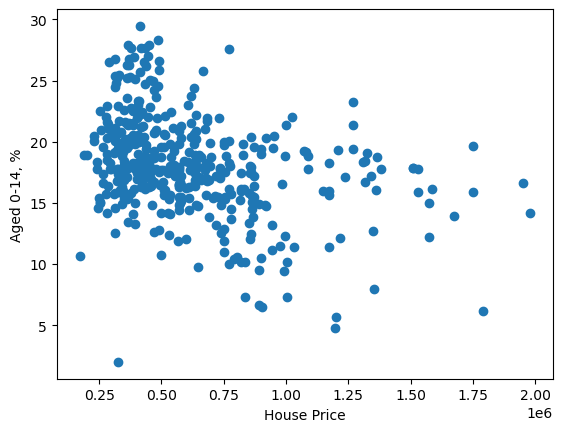

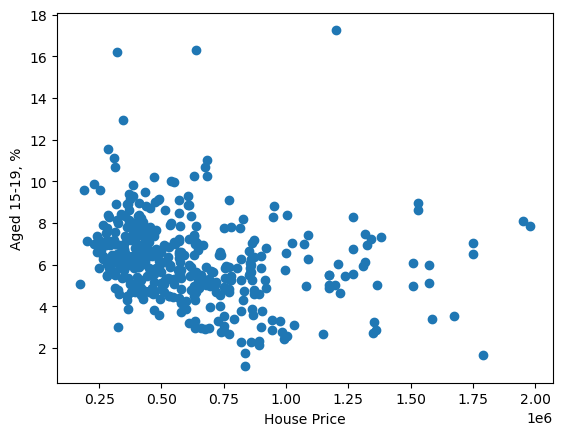

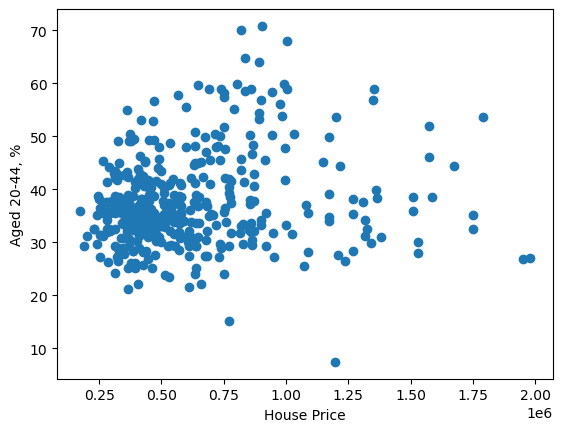

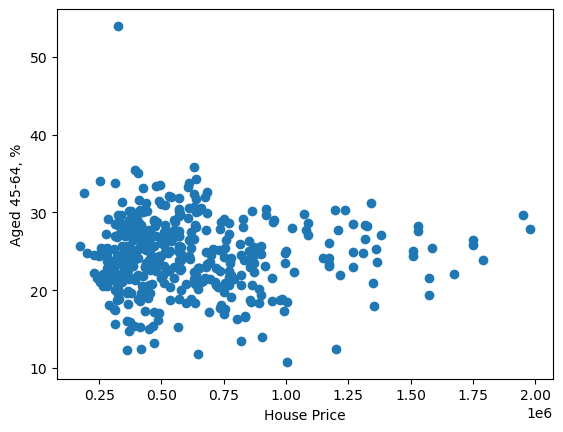

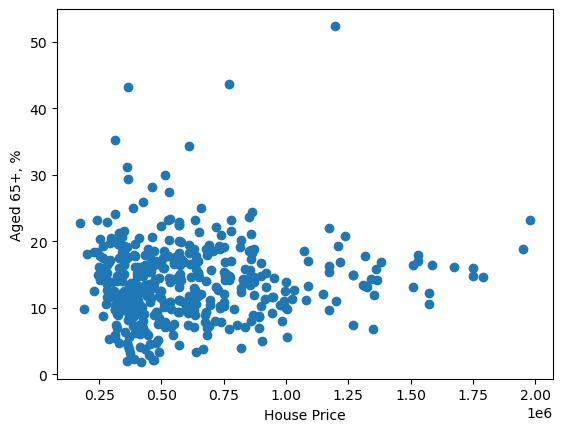

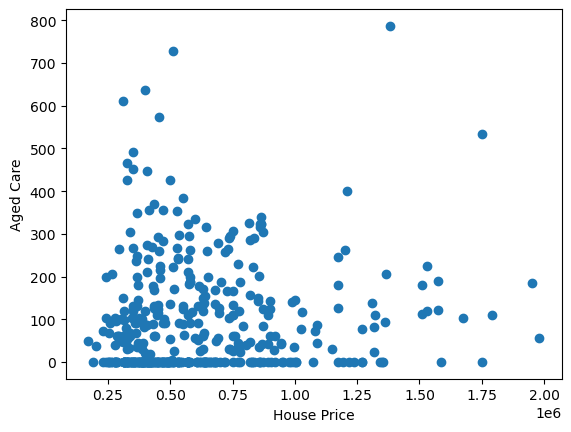

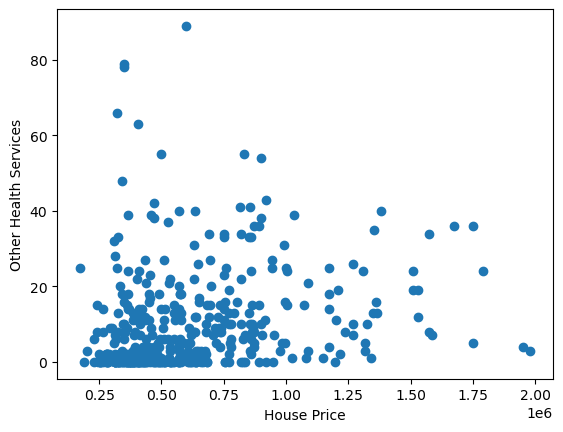

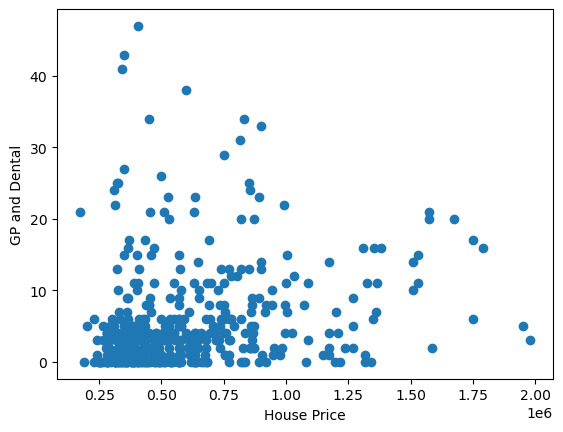

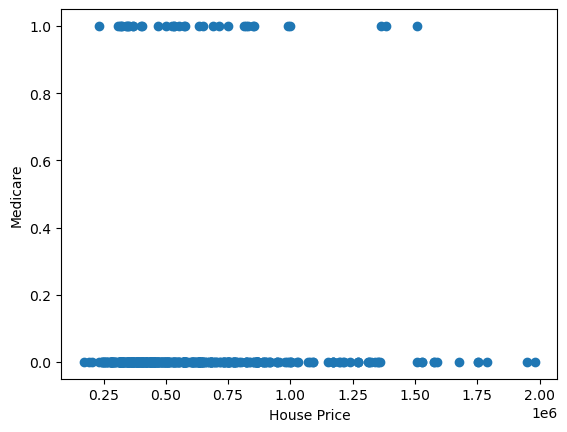

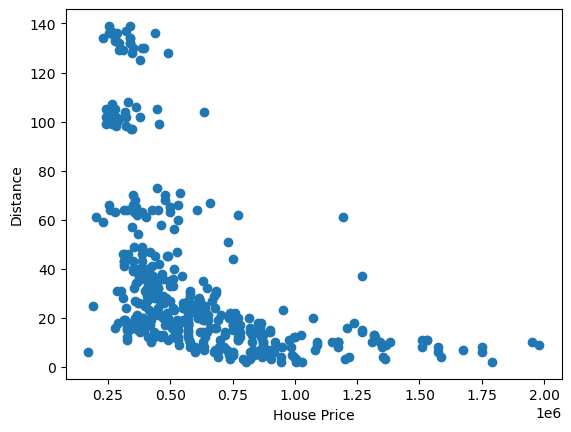

In [231]:
# plotting scatterplots for each column against House Price
for i in range(0, len(clean_column_dtypes)):
    if (clean_column_dtypes[i] != 'object'):
        plt.scatter(suburbs_and_communities['House Price'], suburbs_and_communities[column_names[i]])
        plt.xlabel('House Price')
        plt.ylabel(column_names[i])
        plt.show()

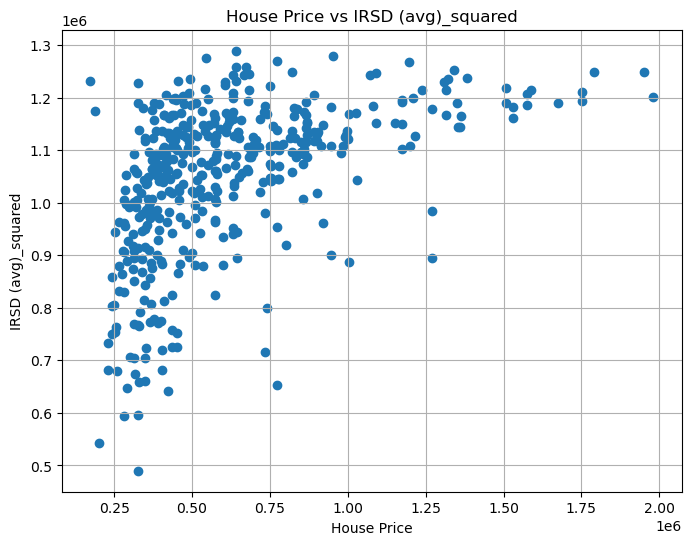

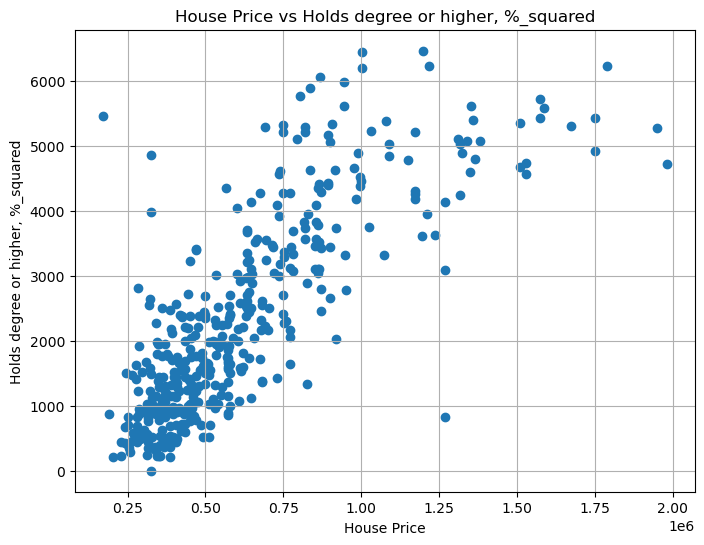

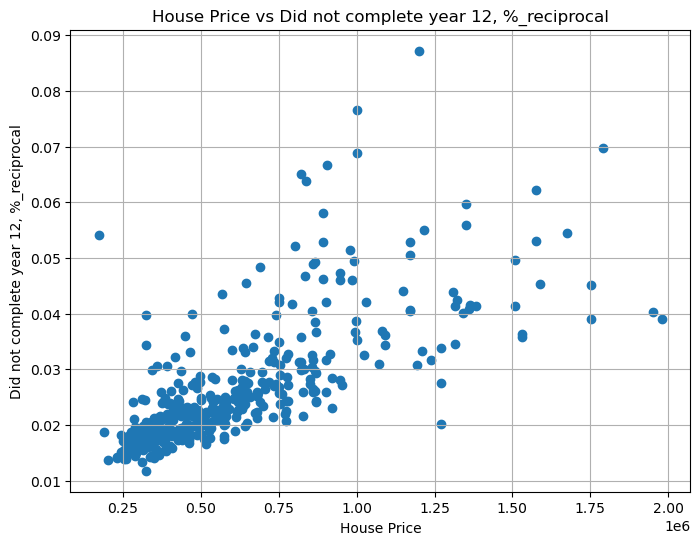

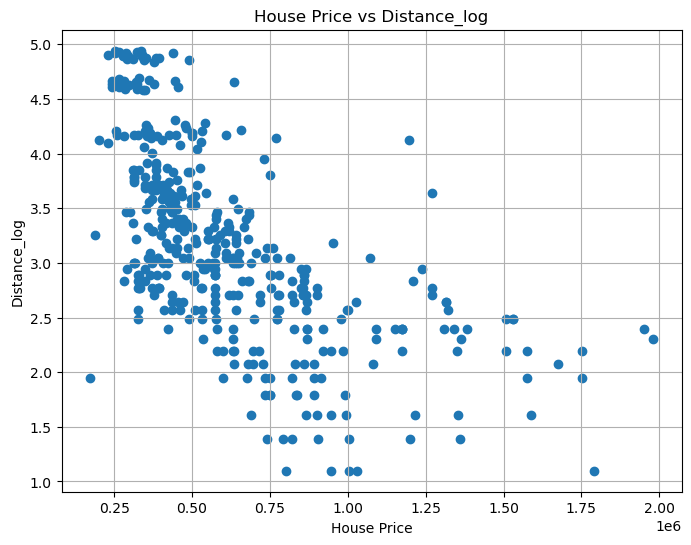

In [232]:
# show the result of linearising some of the columns using transformations
for transformed_col in transformed_cols:
    # Plot scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(suburbs_and_communities_lr['House Price'], suburbs_and_communities_lr[transformed_col])
    plt.title(f'House Price vs {transformed_col}')
    plt.xlabel('House Price')
    plt.ylabel(f'{transformed_col}')
    plt.grid(True)
    plt.show()

In [233]:
# counting outliers in the df
def count_outliers(df):
    outlier_counts = []
    threshold = int(df.shape[0] * 0.1)

    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        if outlier_count > threshold:
            outlier_counts.append((outlier_count, column))
        
    return outlier_counts

outlier_counts = count_outliers(suburbs_and_communities_num)
outlier_counts = sorted(outlier_counts, reverse=True)
print(outlier_counts)
print(len(outlier_counts))

[(86, 'Community Health Centres'), (81, 'Rural (%)'), (77, 'Private Hospitals'), (72, 'Industrial (%)'), (67, 'ARIA+ (avg)'), (56, 'Mental Health'), (53, 'Child Protection and Family'), (51, 'Commercial (%)'), (46, 'Distance')]
9


In [234]:
# exploring outliers

suburbs_and_communities[suburbs_and_communities['Community Health Centres'] > suburbs_and_communities['Community Health Centres'].median()]['Distance'].describe()


count     86.000000
mean      28.744186
std       32.065076
min        2.000000
25%       11.000000
50%       19.000000
75%       29.000000
max      137.000000
Name: Distance, dtype: float64

In [235]:
suburbs_and_communities[suburbs_and_communities['Rural (%)'] > suburbs_and_communities['Rural (%)'].median()]['LGA'].value_counts()

Yarra Ranges (S)            23
Mornington Peninsula (S)    17
Greater Bendigo (C)         14
Casey (C)                   14
Ballarat (C)                12
Knox (C)                     9
Greater Geelong (C)          9
Frankston (C)                8
Nillumbik (S)                8
Manningham (C)               8
Whittlesea (C)               6
Hume (C)                     6
Kingston (C)                 5
Wyndham (C)                  5
Maroondah (C)                4
Cardinia (S)                 4
Brimbank (C)                 4
Greater Dandenong (C)        3
Banyule (C)                  3
Melton (S)                   1
Whitehorse (C)               1
Name: LGA, dtype: int64

In [236]:
# discretise function to discretise numerical continuous data into bins
def discretise(df, targetcol, bin_size):
    discretiser = KBinsDiscretizer(n_bins=bin_size, encode='ordinal', strategy='uniform')
    col_discretized = discretiser.fit_transform(df[[targetcol]])
    return pd.Series(col_discretized.flatten(), name=f"{targetcol}_d")

# using the function to discretise numerical columns and saving it to a discretised copy of the df
for i in num_column_names:
    discretise(suburbs_and_communities_d, i, 15)
    suburbs_and_communities_d[i] = discretise(suburbs_and_communities_d, i,15)

suburbs_and_communities_d.head()

,Community Name,House Price,Region,Population Density,LGA,IRSD (avg),Area (km^2),ARIA+ (avg),Commercial (%),Industrial (%),...,Aged Care,Other Health Services,GP and Dental,Medicare,Distance,Direction,IRSD (avg)_squared,"Holds degree or higher, %_squared","Did not complete year 12, %_reciprocal",Distance_log
0,Abbotsford (Suburb),5.0,Northern and Western Metropolitan,5.0,Yarra (C),12.0,0.0,0.0,5.0,3.0,...,1.0,2.0,1.0,0.0,0.0,ENE,11.0,11.0,5.0,1.0
1,Aberfeldie (Suburb),6.0,Northern and Western Metropolitan,4.0,Moonee Valley (C),13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NW,12.0,7.0,3.0,4.0
2,Airport West (Suburb),2.0,Northern and Western Metropolitan,3.0,Moonee Valley (C),10.0,1.0,0.0,6.0,0.0,...,0.0,0.0,1.0,14.0,1.0,NW,9.0,3.0,1.0,5.0
3,Albanvale (Suburb),1.0,Northern and Western Metropolitan,5.0,Brimbank (C),6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,WNW,5.0,2.0,1.0,7.0
4,Albert Park (Suburb),9.0,Southern Metropolitan,3.0,Port Phillip (C),12.0,1.0,0.0,0.0,0.0,...,1.0,2.0,2.0,0.0,0.0,S,12.0,12.0,5.0,1.0


In [237]:
# import libraries
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import entropy
import numpy as np

# normalized  mutual information function that calculates the normalized mi score for each column
def normalized_mi(df, lst, housepricecol):
    num = len(lst)
    mi_info = []
    price_col = df.iloc[:, housepricecol]
    
    for i in range(0, num):
        curr_col = df.iloc[:, i]
        normalized_mi_score = normalized_mutual_info_score(curr_col,price_col)
        mi_info.append(normalized_mi_score)
    
    # Format scores to 4 decimal places
    mi_info_formatted = [(float(f"{score:.4f}"), lst[index]) for index, score in enumerate(mi_info)]
    return mi_info_formatted

mi_info = normalized_mi(suburbs_and_communities_d, suburbs_and_communities_d.columns.tolist(),1)
print("Normalized MI Scores:", sorted(mi_info, reverse=True))


Normalized MI Scores: [(1.0, 'House Price'), (0.5182, 'Community Name'), (0.3624, 'LGA'), (0.3016, 'Holds degree or higher, %_squared'), (0.2973, 'Did not complete year 12, %_reciprocal'), (0.2784, 'Holds degree or higher, %'), (0.2701, 'Did not complete year 12, %'), (0.2424, 'Distance_log'), (0.2237, 'Distance'), (0.1935, 'Top language spoken'), (0.1882, 'Top industry'), (0.1689, 'Top occupation'), (0.1613, 'Top country of birth'), (0.1612, 'Population Density'), (0.1596, 'IRSD (avg)_squared'), (0.1569, 'IRSD (avg)'), (0.1551, 'Direction'), (0.1538, 'Born in non-English speaking country, %'), (0.1525, 'Equivalent household income <$600/week, %'), (0.1493, 'Born overseas, %'), (0.1439, 'Region'), (0.1325, 'Dwellings with no internet, %'), (0.1246, 'ARIA+ (avg)'), (0.1218, 'Top country of birth, %'), (0.121, 'Mental Health'), (0.1196, 'Aged 0-14, %'), (0.1191, 'University students'), (0.1154, 'Aged 15-19, %'), (0.1144, 'GP and Dental'), (0.1138, 'Average persons per household'), (0.109

In [238]:
# select the best features based on their MI score
best_mi = ['House Price', 'LGA', 'Holds degree or higher, %_squared', 'Did not complete year 12, %_reciprocal', 'Distance_log', 'Population Density', 'IRSD (avg)_squared', 'Top occupation']

# remove untransformed columns from the best_mi features

#create new df that only has these best MI features
suburbs_and_communities_best = suburbs_and_communities_lr[best_mi]
suburbs_and_communities_best.head()

,House Price,LGA,"Holds degree or higher, %_squared","Did not complete year 12, %_reciprocal",Distance_log,Population Density,IRSD (avg)_squared,Top occupation
0,792500,Yarra (C),5112.679869,0.041683,1.386294,3082.440714,1.110946e+06,Professionals
1,947500,Moonee Valley (C),3324.610396,0.028010,2.197225,2426.665450,1.181903e+06,Professionals
2,532000,Moonee Valley (C),1326.264201,0.019400,2.564949,1972.445069,1.011634e+06,Clerical and Administrative Workers
3,313000,Brimbank (C),1033.353491,0.019162,2.995732,2879.831482,7.683799e+05,Labourers
4,1360000,Port Phillip (C),5398.635851,0.040926,1.386294,1850.280150,1.144161e+06,Professionals


In [239]:
# apply one hot encoding to categorical columns in df_best 
suburbs_comm_encoded = pd.get_dummies(suburbs_and_communities_best, columns=['LGA','Top occupation'], drop_first=True)

In [240]:
# pearson coefficient function for numerical data columns 
def pcoefficient(array1, array2): 

    r = np.corrcoef(array1, array2)

    return r

correlations = []

for col in num_column_names_2: 
    r = pcoefficient(suburbs_and_communities[col], suburbs_and_communities["House Price"])
    r.tolist()
    correlations.append((r[1][0], col))
    correlations.sort()


print(correlations)

[(-0.7384789279808389, 'Did not complete year 12, %'), (-0.498116364141268, 'Distance'), (-0.4969657861089086, 'Equivalent household income <$600/week, %'), (-0.35933051979942027, 'Dwellings with no internet, %'), (-0.3455549216714801, 'Aged 0-14, %'), (-0.34534286356298427, 'ARIA+ (avg)'), (-0.2450908327708099, 'Unemployed, %'), (-0.23431159158817602, 'Aged 15-19, %'), (-0.22841793542029798, 'Area (km^2)'), (-0.2045614709354757, 'Distance to nearest public hospital'), (-0.19697889279987474, 'Rural (%)'), (-0.1696877943765536, 'Average persons per household'), (-0.16947044899732494, 'Industrial (%)'), (-0.11513620384215725, '% dwellings which are public housing'), (-0.0855054940137343, 'Occupied private dwellings, %'), (-0.05212516211409277, 'TAFE students'), (-0.0423558540138771, 'Centrelink Offices'), (-0.02635446966922541, 'Top country of birth, %'), (-0.025810441303494015, 'Community Health Centres'), (-0.007314484988485621, 'Aged 45-64, %'), (0.009357427642336682, 'Child Protectio

# **MODELLING**

**Decision Tree Model**

In [241]:
# import libraries
from sklearn.model_selection import KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import math

Accuracy fold 1: 0.872093023255814
Accuracy fold 2: 0.8705882352941177
Accuracy fold 3: 0.8588235294117647
Accuracy fold 4: 0.8117647058823529
Accuracy fold 5: 0.8470588235294118
mean accuracy: 0.852065663474692


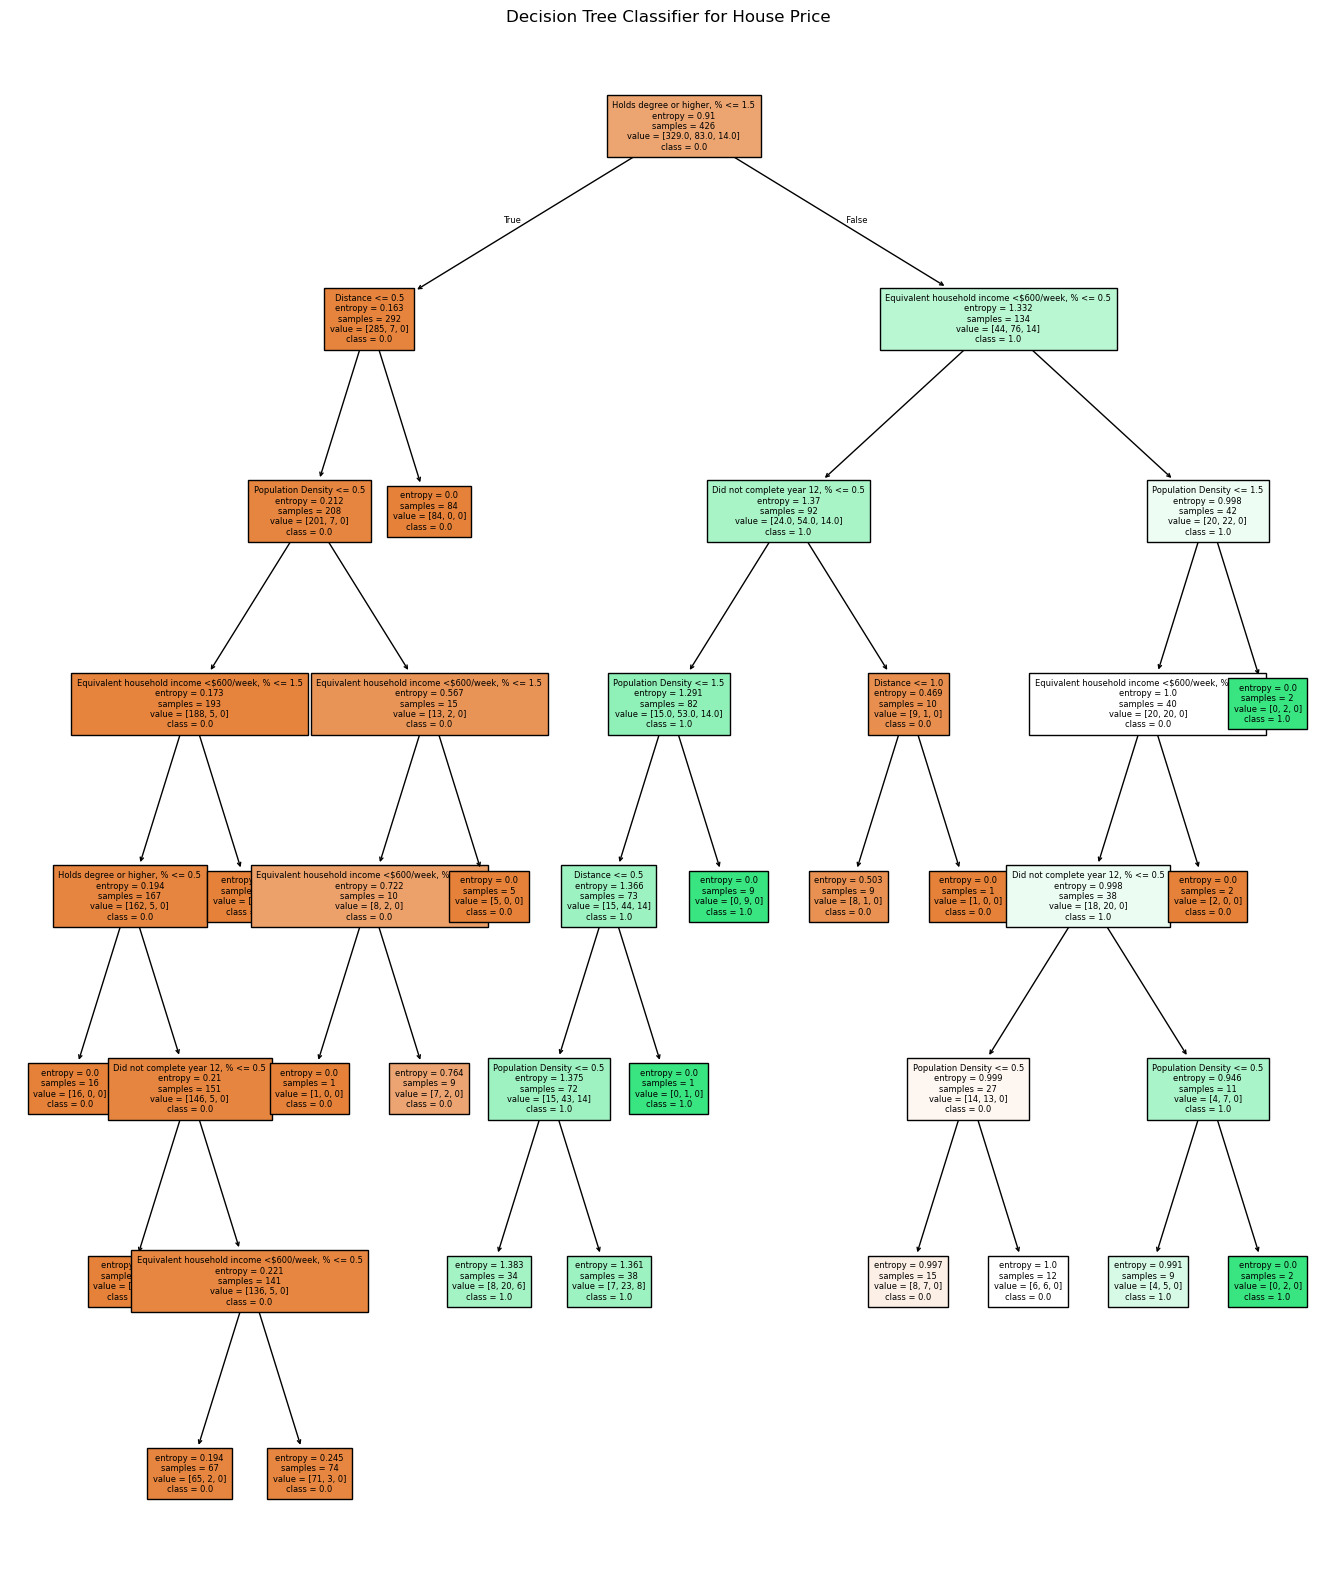

In [242]:
# the structure of the code below is mainly copied from tutoiral 10 

# this decision tree includes 4 factors

suburbs_and_communities_dt = suburbs_and_communities.copy()

for i in num_column_names_2:
    discretise(suburbs_and_communities_dt, i,3)
    suburbs_and_communities_dt[i] = discretise(suburbs_and_communities_dt, i,3)


X_COLS = ['Did not complete year 12, %', 'Distance','Equivalent household income <$600/week, %', 'Population Density','Holds degree or higher, %']
y_COL = 'House Price'


X = OrdinalEncoder().fit_transform(suburbs_and_communities_dt[X_COLS])
y = OrdinalEncoder().fit_transform(suburbs_and_communities_dt[[y_COL]])

nf_CV = KFold(n_splits=5, shuffle=True, random_state=42)
results =[]
fold = 0
for train_idx, test_idx in nf_CV.split(X):
    fold = fold + 1
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    dt2 = DecisionTreeClassifier(criterion = 'entropy') # do we need to work out the entropy ourselves as well

    dt2.fit(X_train, y_train)

    y_pred = dt2.predict(X_test)

    accuracy = dt2.score(X_test, y_test)
    results.append(accuracy)
    print(f"Accuracy fold {fold}: {accuracy}")

print(f"mean accuracy: {np.mean(results)}")


# visualise entire dataset dt
dt2.fit(X,y)
plt.figure(figsize = [17.0, 20.0])
plot_tree(dt2, # the DT classifier
          feature_names= ['Did not complete year 12, %', 'Distance','Equivalent household income <$600/week, %', 'Population Density','Holds degree or higher, %'], # put in factors that influence house price
          class_names=['0.0', '1.0', '2.0'], # class labels of the bins in those things 
          filled=True,
          fontsize = 6
         )

plt.title("Decision Tree Classifier for House Price")

plt.show()


Accuracy fold 1: 0.9069767441860465
Accuracy fold 2: 0.8470588235294118
Accuracy fold 3: 0.8588235294117647
Accuracy fold 4: 0.8117647058823529
Accuracy fold 5: 0.8823529411764706
mean accuracy: 0.8613953488372094


Text(0.5, 1.0, 'Decision Tree Classifier for House Price')

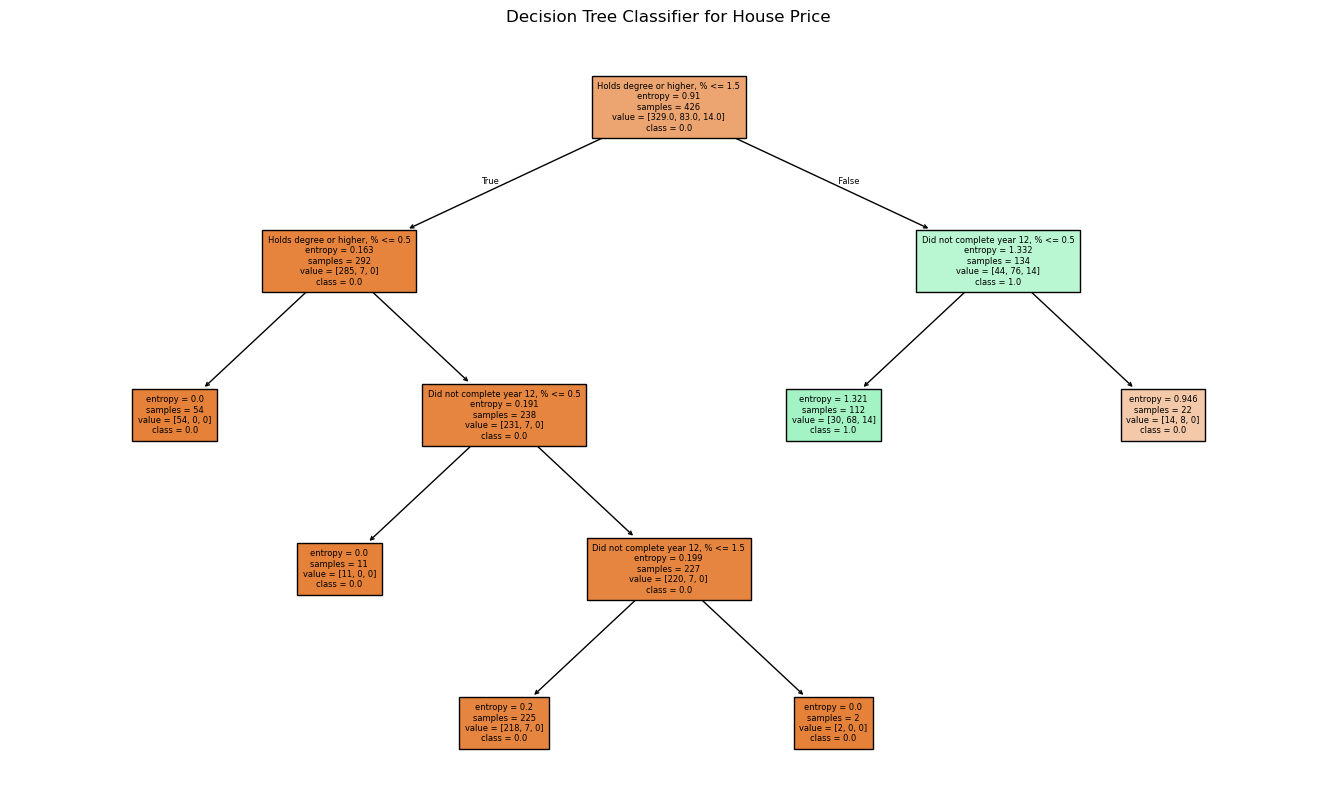

In [243]:
# the structure of the code below is mainly copied from tutoiral 10 

# this one is the decision tree with only 2 factors this time. 

suburbs_and_communities_dt = suburbs_and_communities.copy()

for i in num_column_names_2:
    discretise(suburbs_and_communities_dt, i,3)
    suburbs_and_communities_dt[i] = discretise(suburbs_and_communities_dt, i,3)


X_COLS = ['Did not complete year 12, %','Holds degree or higher, %']
y_COL = 'House Price'


X = OrdinalEncoder().fit_transform(suburbs_and_communities_dt[X_COLS])
y = OrdinalEncoder().fit_transform(suburbs_and_communities_dt[[y_COL]])

nf_CV = KFold(n_splits=5, shuffle=True, random_state=42)
results =[]
fold = 0
for train_idx, test_idx in nf_CV.split(X):
    fold = fold + 1
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    dt2 = DecisionTreeClassifier(criterion = 'entropy') # do we need to work out the entropy ourselves as well

    dt2.fit(X_train, y_train)

    y_pred = dt2.predict(X_test)

    accuracy = dt2.score(X_test, y_test)
    results.append(accuracy)
    print(f"Accuracy fold {fold}: {accuracy}")
print(f"mean accuracy: {np.mean(results)}")


# visualise entire dataset dt
dt2.fit(X,y)
plt.figure(figsize = [17.0, 10.0])
plot_tree(dt2, # the DT classifier
          feature_names= ['Did not complete year 12, %','Holds degree or higher, %'], # put in factors that influence house price
          class_names=['0.0', '1.0', '2.0'], # class labels of the bins in those things 
          filled=True,
          fontsize = 6
         )

plt.title("Decision Tree Classifier for House Price")

**Linear Regression Models**

In [244]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import math
from sklearn.model_selection import KFold

In [245]:
# linear regression model with all numerical data 

X = suburbs_and_communities_num.drop(['House Price'],axis=1)  
y = suburbs_and_communities_num['House Price']  

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = LinearRegression()

# Cross validation 
nf_CV = KFold(n_splits=5, shuffle=True, random_state=42)
mse_result = []
r2_result = []
fold = 0
# use cross validation and fit models  
for train_idx, test_idx in nf_CV.split(X):
    fold = fold+1
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # scale the data to minimise effects of different scales between columns
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #fit model 
    model.fit(X_train_scaled, y_train)

    #predictions
    y_pred = model.predict(X_test_scaled)

    # calculate mse and r2 for this fold, then add to list
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_result.append(np.sqrt(mse))
    r2_result.append(r2)

    # print mse and r2 
    print(f"Fold no {fold}: RMSE = {np.sqrt(mse):.4f}, rsq = {r2:.4f}")

# Feature importance (based on absolute value of coefficients)
importance = model.coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})
print(f"Average RMSE: {np.mean(mse_result)}")
print(f"Average rsq: {np.mean(r2_result)}")
# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance['Importance'] = feature_importance['Importance'].apply(lambda x: format(x, '.2f'))
print("\nFeature Importance:\n", feature_importance)

feature_importance['Importance'] = feature_importance['Importance'].astype(float)

Fold no 1: RMSE = 168162.7678, rsq = 0.6589
Fold no 2: RMSE = 221018.5052, rsq = 0.5668
Fold no 3: RMSE = 190599.6673, rsq = 0.6620
Fold no 4: RMSE = 209168.0946, rsq = 0.6673
Fold no 5: RMSE = 175498.6701, rsq = 0.5610
Average RMSE: 192889.540998924
Average rsq: 0.6231945835963975

Feature Importance:
                                       Feature  Importance
19                       Number of Households   301357.95
8                             2012 ERP, total   271274.18
27                  Secondary school students   250929.60
3                                 ARIA+ (avg)    98045.23
30                  Holds degree or higher, %    89793.04
1                                  IRSD (avg)    78814.98
33                           Born overseas, %    55136.23
10                          Private Hospitals    40833.51
41                                Aged 65+, %    35525.94
0                          Population Density    32613.63
40                              Aged 45-64, %    30366.12

In [246]:
# linear regression model with best mi features data 

X = suburbs_comm_encoded.drop(['House Price'],axis=1)  
y = suburbs_comm_encoded['House Price']  

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = LinearRegression()

# Cross validation 
nf_CV = KFold(n_splits=5, shuffle=True, random_state=42)
mse_result = []
r2_result = []
fold = 0
# use cross validation and fit models  
for train_idx, test_idx in nf_CV.split(X):
    fold = fold+1
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # scale the data to minimise effects of different scales between columns
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #fit model 
    model.fit(X_train_scaled, y_train)

    #predictions
    y_pred = model.predict(X_test_scaled)

    # calculate mse and r2 for this fold, then add to list
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_result.append(np.sqrt(mse))
    r2_result.append(r2)

    # print mse and r2 
    print(f"Fold no {fold}: RMSE = {np.sqrt(mse):.4f}, rsq = {r2:.4f}")

# Feature importance (based on absolute value of coefficients)
importance = model.coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})
print(f"Average RMSE: {np.mean(mse_result)}")
print(f"Average rsq: {np.mean(r2_result)}")
# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance['Importance'] = feature_importance['Importance'].apply(lambda x: format(x, '.2f'))
print("\nFeature Importance:\n", feature_importance)

feature_importance['Importance'] = feature_importance['Importance'].astype(float)

Fold no 1: RMSE = 132632.6973, rsq = 0.7878
Fold no 2: RMSE = 202582.2487, rsq = 0.6360
Fold no 3: RMSE = 160617.4828, rsq = 0.7600
Fold no 4: RMSE = 152128.6461, rsq = 0.8240
Fold no 5: RMSE = 141392.8729, rsq = 0.7150
Average RMSE: 157870.78955464833
Average rsq: 0.7445759207012902

Feature Importance:
                                            Feature Importance
0                Holds degree or higher, %_squared  139105.34
7                               LGA_Boroondara (C)  123505.65
4                               IRSD (avg)_squared   49402.30
13                               LGA_Glen Eira (C)   48387.86
31                            LGA_Port Phillip (C)   39670.33
32                             LGA_Stonnington (C)   35930.81
29                    LGA_Mornington Peninsula (S)   34557.46
6                                  LGA_Bayside (C)   30459.74
40                         Top occupation_Managers   24219.43
33                              LGA_Whitehorse (C)   23902.95
19         